# Exercise - Multivariate Regression with the Boston Housing Data set

The dataset contains prices of houses(MEDV) in Boston City(USA) based on various parameters. The dataset is available at https://www.kaggle.com/vikrishnan/boston-house-prices/data.
We have to predict the house prices based on the variables provided in the dataset. 

### The first step is analysis of the data. Plot & answer the following questions regarding the data.

1. Determine if there any values missing in any rows/columns. Filter out such rows. 
2. Find out the correlation of this dataset using pandas. Plot a heatmap of this matrix. Which features have a higher correlation with MEDV? Are there any features which are correlated with other features? What are those? 
2. Plot different scatter plots of all feature variables with MEDV. Observe trends based on the plots. Which features are more likely to give a precise value for MEDV?

### With the analysis done above of the dataset, remove the columns which are not likely to predict MEDV. Perform Linear regression on this new filtered dataset. 
1. Perform a 80:20 split with the train_test_split function, with random_state=0. Perform linear regression on the training dataset. Print the obtained co-efficients for every feature. Which features have more weightage? 
2. Plot a scatter of test prices vs obtained prices. Obtain the MSE, R^2 score of this model. 

### With the original dataset, i.e with all the features, perform the above steps again. Which model gives you a better accuracy?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read csv
cols = ['CRIM', "ZN", "INDUS", "CHAS", "NOX", "RM" , "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv('./data/housing.csv', names=cols, header=None)
#df.head(100)

In [3]:
df.isnull().sum()
df=df.dropna()
#df

In [4]:
df1=df.corr()
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.281239,0.573822,0.050066,0.636941,-0.142458,0.447664,-0.461967,0.897988,0.825668,0.319470,-0.413014,0.424789,-0.286245
ZN,-0.281239,1.000000,-0.514273,-0.059697,-0.500729,0.306623,-0.555679,0.656152,-0.266606,-0.269446,-0.364122,0.150380,-0.411165,0.331570
INDUS,0.573822,-0.514273,1.000000,0.103016,0.738517,-0.364895,0.605982,-0.669362,0.513306,0.673312,0.317336,-0.316752,0.565402,-0.411915
CHAS,0.050066,-0.059697,0.103016,1.000000,0.134064,0.076580,0.123141,-0.140662,0.057337,0.016894,-0.099623,0.013415,-0.009430,0.154409
NOX,0.636941,-0.500729,0.738517,0.134064,1.000000,-0.264594,0.707148,-0.745812,0.542499,0.615120,0.103464,-0.358433,0.536824,-0.332778
RM,-0.142458,0.306623,-0.364895,0.076580,-0.264594,1.000000,-0.187871,0.138774,-0.095931,-0.214948,-0.334164,0.108352,-0.607289,0.740181
AGE,0.447664,-0.555679,0.605982,0.123141,0.707148,-0.187871,1.000000,-0.720334,0.359326,0.427095,0.192956,-0.223765,0.573266,-0.299893
DIS,-0.461967,0.656152,-0.669362,-0.140662,-0.745812,0.138774,-0.720334,1.000000,-0.388385,-0.444131,-0.152253,0.234449,-0.423725,0.138798
RAD,0.897988,-0.266606,0.513306,0.057337,0.542499,-0.095931,0.359326,-0.388385,1.000000,0.872876,0.387484,-0.352586,0.309788,-0.217902
TAX,0.825668,-0.269446,0.673312,0.016894,0.615120,-0.214948,0.427095,-0.444131,0.872876,1.000000,0.384511,-0.367084,0.410927,-0.345898


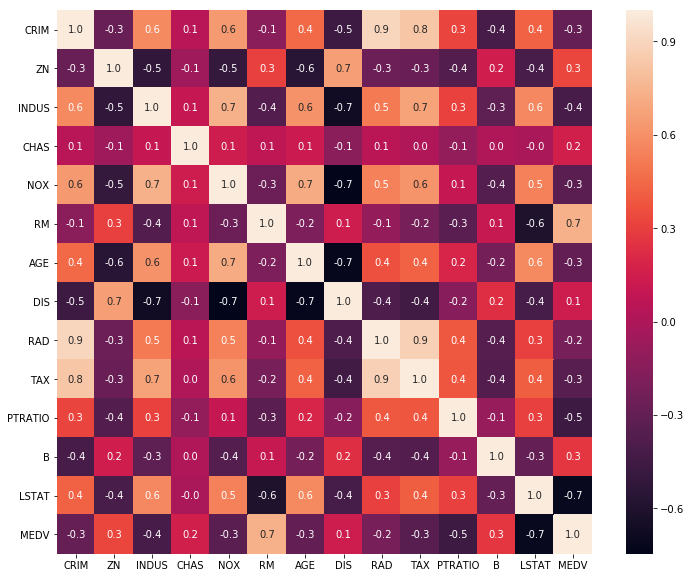

In [5]:
import seaborn as sb
plt.figure(figsize=(12,10))
sb.heatmap(df.corr(),annot=True,fmt='.1f')

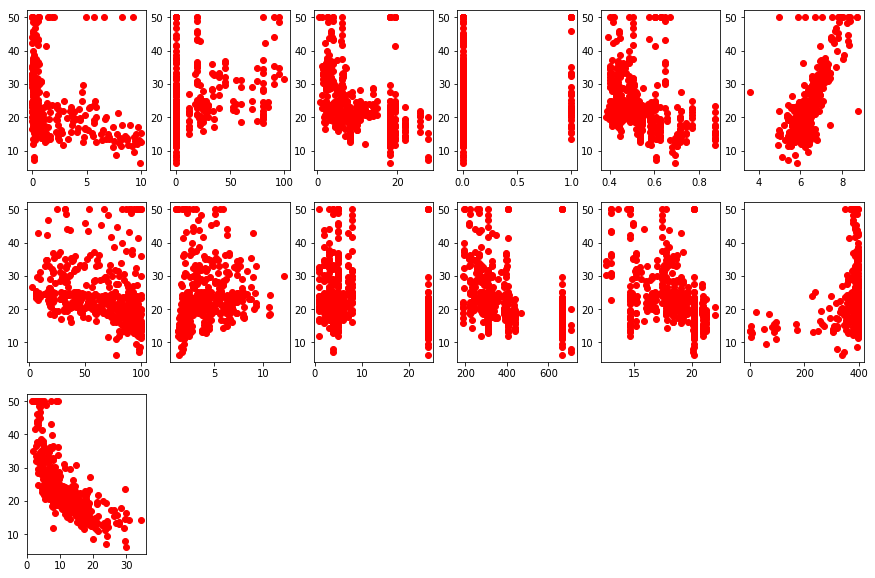

In [6]:
a=df.iloc[:,0]
b=df.iloc[:,1]
c=df.iloc[:,2]
d=df.iloc[:,3]
e=df.iloc[:,4]
f=df.iloc[:,5]
g=df.iloc[:,6]
h=df.iloc[:,7]
i=df.iloc[:,8]
j=df.iloc[:,9]
k=df.iloc[:,10]
l=df.iloc[:,11]
m=df.iloc[:,12]
n=df.iloc[:,13]
plt.figure(figsize=(15,10))
plt.subplot(3,6,1)
plt.plot(a,n,'ro')
plt.subplot(3,6,2)
plt.plot(b,n,'ro')
plt.subplot(3,6,3)
plt.plot(c,n,'ro')
plt.subplot(3,6,4)
plt.plot(d,n,'ro')
plt.subplot(3,6,5)
plt.plot(e,n,'ro')
plt.subplot(3,6,6)
plt.plot(f,n,'ro')
plt.subplot(3,6,7)
plt.plot(g,n,'ro')
plt.subplot(3,6,8)
plt.plot(h,n,'ro')
plt.subplot(3,6,9)
plt.plot(i,n,'ro')
plt.subplot(3,6,10)
plt.plot(j,n,'ro')
plt.subplot(3,6,11)
plt.plot(k,n,'ro')
plt.subplot(3,6,12)
plt.plot(l,n,'ro')
plt.subplot(3,6,13)
plt.plot(m,n,'ro')

In [7]:
#plt.figure(figsize=(15,10))
#for i in range(0,14):
#    plt.subplot(3,6,1)
#plt.plot(a,n,'ro')
#    df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
fea_to_consider=['INDUS','NOX','RM','AGE','PTRATIO','LSTAT']
X=df[fea_to_consider]
Y=df['MEDV']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=21)

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print(x_test)
#print(y_test)
#model.predict(x_test)

     INDUS    NOX     RM    AGE  PTRATIO  LSTAT
358  18.10  0.770  6.127   83.4     20.2  11.48
96    2.89  0.445  6.163   69.6     18.0  11.34
61    5.13  0.453  5.966   93.4     19.7  14.44
341   1.52  0.442  7.241   49.3     15.5   5.49
134  21.89  0.624  5.757   98.4     21.2  17.31
492  27.74  0.609  5.983   83.5     20.1  13.35
51    5.64  0.439  6.115   63.0     16.8   9.43
37    5.96  0.499  5.850   41.5     19.2   8.77
345   4.39  0.442  6.014   48.5     18.8  10.53
493   9.69  0.585  5.707   54.0     19.2  12.01
157  19.58  0.605  6.943   97.4     14.7   4.59
66    3.37  0.398  5.787   31.1     16.1  10.24
423  18.10  0.614  6.103   85.1     20.2  23.29
187   3.44  0.437  6.782   41.1     15.2   6.68
43    6.91  0.448  6.211    6.5     17.9   7.44
128  21.89  0.624  6.431   98.8     21.2  15.39
147  19.58  0.871  4.926   95.7     14.7  29.53
351   1.69  0.411  6.579   35.9     18.3   5.49
123  25.65  0.581  5.856   97.0     19.1  25.41
231   6.20  0.504  7.412   76.9     17.4

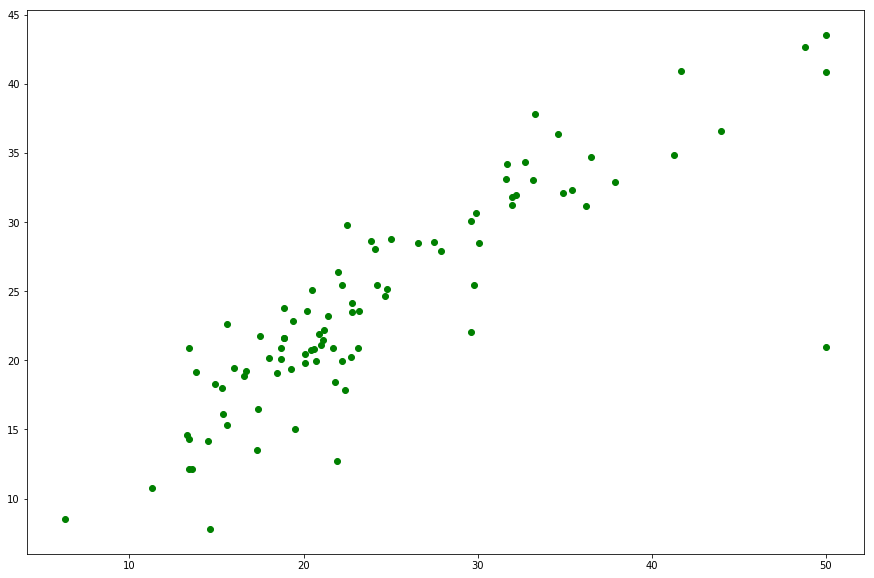

In [10]:
plt.figure(figsize=(15,10))
plt.plot(y_test,model.predict(x_test),'go')

In [11]:
print("Training set accuracy:",model.score(x_train,y_train))
print("Test set accuracy:",model.score(x_test,y_test))

Training set accuracy: 0.673629621442
Test set accuracy: 0.745727163761


In [12]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,model.predict(x_train))
print('SGD MSE',mse)

SGD MSE 24.6458203318
